
# <span style='color:Blue'> Deep Learning for AI </span>

# <span style='color:Blue'> Assignment 2 </span>

 ### <span style='font-family:Georgia'> 1.Implement perceptron model on Iris dataset ( binary class). Write comments on everything that you do by inserting text cells

#### <span style='font-family:Georgia'> a) Run the perceptron algorithm on the above data set of Iris ( binary class)

#### <span style='font-family:Georgia'> b) Plot Train/test accuracy

#### <span style='font-family:Georgia'> c) Try changing the learning rates and write your interpretation on the change in result

#### <span style='font-family:Georgia'> d) In the practice code given we had visualizedthe weights associated with each feature as a graph. Now you modify the code such that you can save all the weights in each epoch and try plotting all of those( Use Weight matrix inside the epoch loop and keep appending the weights). Write your interpretations on the same in your own words

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", Warning)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn
import matplotlib.pyplot as plt
import matplotlib.cm as cm

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
iris = sklearn.datasets.load_iris()

Text(0.5, 1.0, 'Petal Sample')

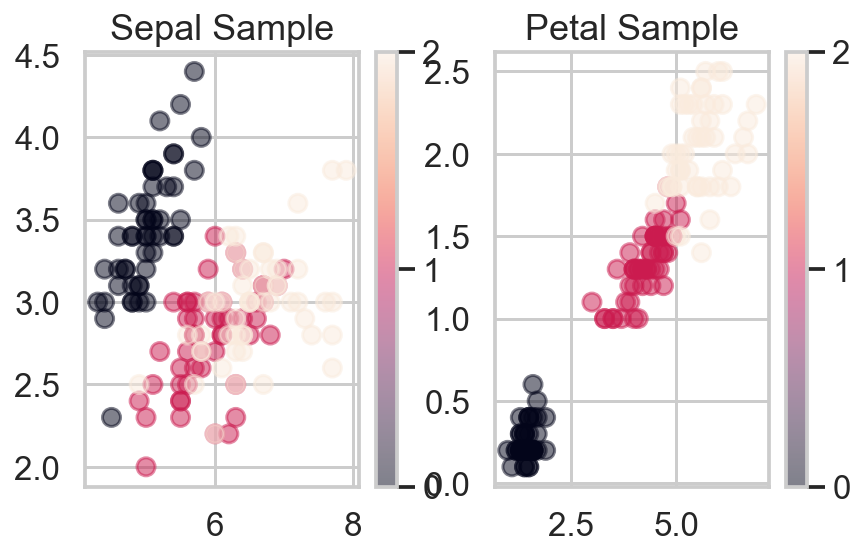

In [3]:
n_samples, n_features = iris.data.shape

plt.subplot(1, 2, 1)
scatter_plot = plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5, 
                           c=iris.target) 
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Sepal Sample')

plt.subplot(1, 2, 2)
scatter_plot_2 = plt.scatter(iris.data[:,2], iris.data[:,3], alpha=0.5, 
                           c=iris.target)
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Petal Sample')

In [4]:
X = iris.data
Y = iris.target

In [5]:
print(X.shape, Y.shape)

(150, 4) (150,)


In [6]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [7]:
data['class'] = iris.target

In [8]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
print(data['class'].value_counts())

0    50
1    50
2    50
Name: class, dtype: int64


In [11]:
data.groupby('class').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [12]:
## Training

from sklearn.model_selection import train_test_split

In [13]:
X = data.drop(['class'], axis=1)
Y = data['class']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [15]:
print(Y.shape, Y_train.shape, Y_test.shape)

(150,) (112,) (38,)


In [16]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (112, 4) (38, 4)


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [18]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

1.0 0.9925925925925926 1.0666666666666667


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y)

In [20]:
print(X_train.mean(), X_test.mean(), X.mean())

sepal length (cm)    5.854815
sepal width (cm)     3.055556
petal length (cm)    3.752593
petal width (cm)     1.202222
dtype: float64 sepal length (cm)    5.740000
sepal width (cm)     3.073333
petal length (cm)    3.806667
petal width (cm)     1.173333
dtype: float64 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)

In [22]:
print(X_train.mean(), X_test.mean(), X.mean())

sepal length (cm)    5.889630
sepal width (cm)     3.074074
petal length (cm)    3.790370
petal width (cm)     1.202963
dtype: float64 sepal length (cm)    5.426667
sepal width (cm)     2.906667
petal length (cm)    3.466667
petal width (cm)     1.166667
dtype: float64 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


## Perceptron Neural Network

In [23]:
X_train = X_train.values
X_test = X_test.values

In [24]:
print (Y_train)

77     1
114    2
110    2
139    2
39     0
      ..
45     0
118    2
41     0
127    2
42     0
Name: class, Length: 135, dtype: int32


Text(0, 0.5, 'petal width (cm)')

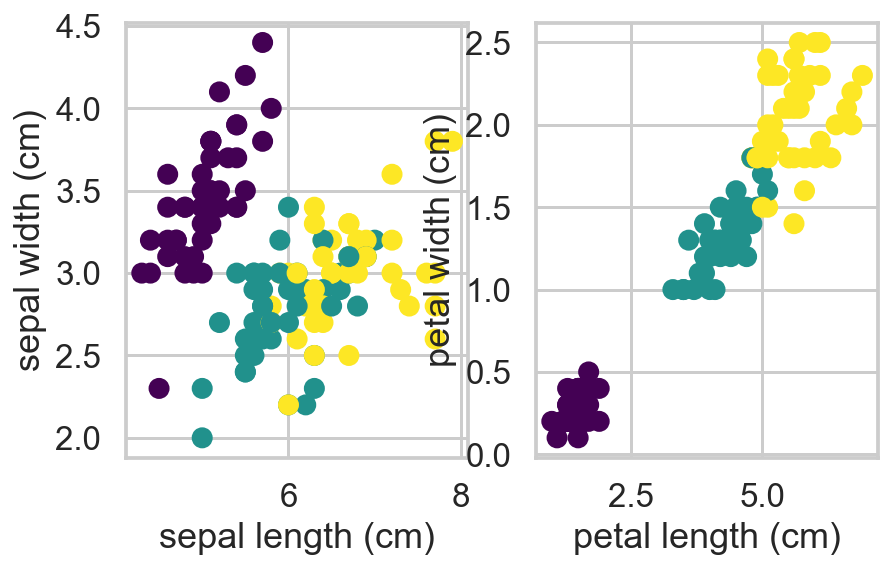

In [25]:
plt.subplot(1, 2, 1)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=cm.viridis)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.subplot(1, 2, 2)
plt.scatter(X_train[:,2],X_train[:,3],c=Y_train,cmap=cm.viridis)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

In [26]:
class Perceptron:
  
    def __init__ (self):
        self.w = None
        self.b = None
    
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1, plot_graphs=True):
    
        self.w = np.ones(X.shape[1])
        self.b = 0
        
        accuracy = {}
        max_accuracy = 0
        
        weight_epoch = []
        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1
            weight_epoch.append([self.w, i])
                       
              
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
            
        self.w = chkptw
        self.b = chkptb
            
        #print(max_accuracy)
        
        if(plot_graphs):
            plt.plot(np.array(list(accuracy.values())).astype(float))
            plt.ylim([0, 1])
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.show()
        return max_accuracy, weight_epoch

In [27]:
perceptron = Perceptron()

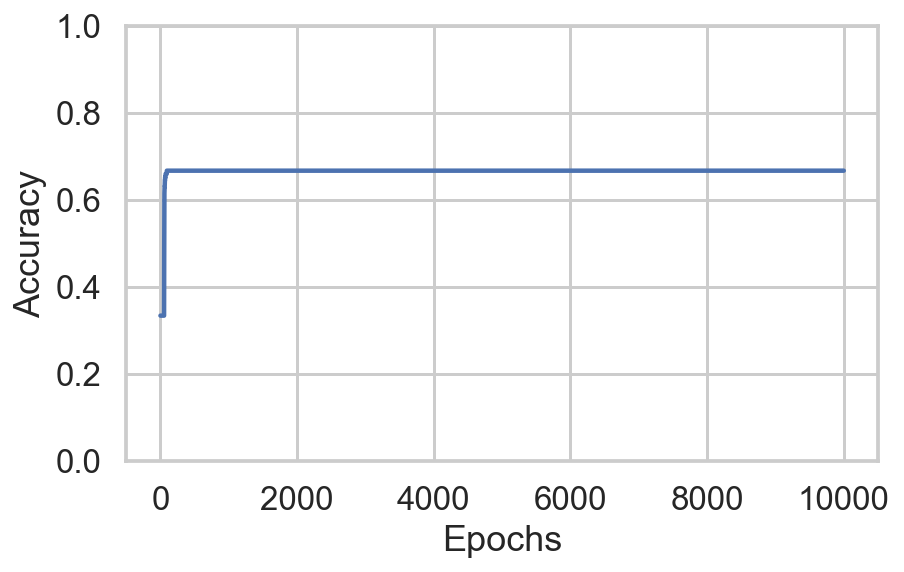

Train Accuracy =  0.6666666666666666


In [28]:
##  Plot Train/test accuracy
train_accuracy, weight_epoch = perceptron.fit(X_train, Y_train, 10000, 0.0001, True)
print("Train Accuracy = ", train_accuracy)

In [29]:
perceptron.w

array([-0.31983,  0.09286,  0.61298,  0.93332])

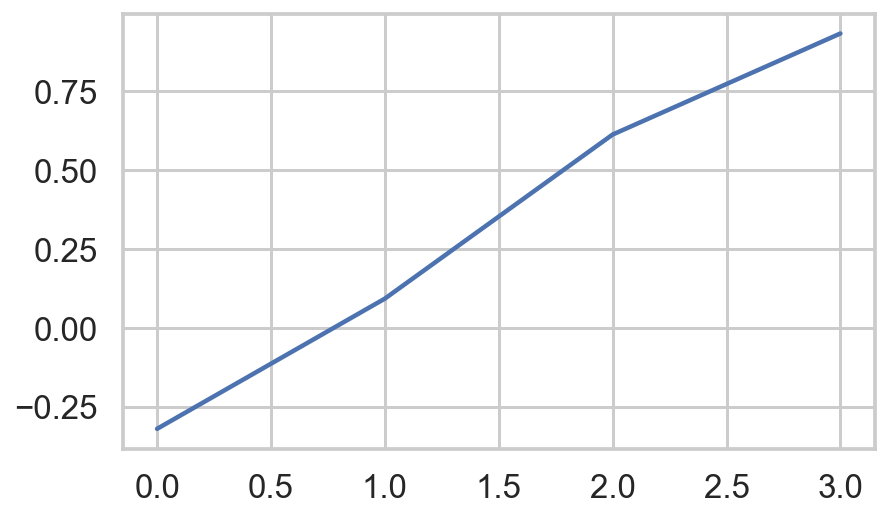

In [30]:
plt.plot(perceptron.w)
plt.show()

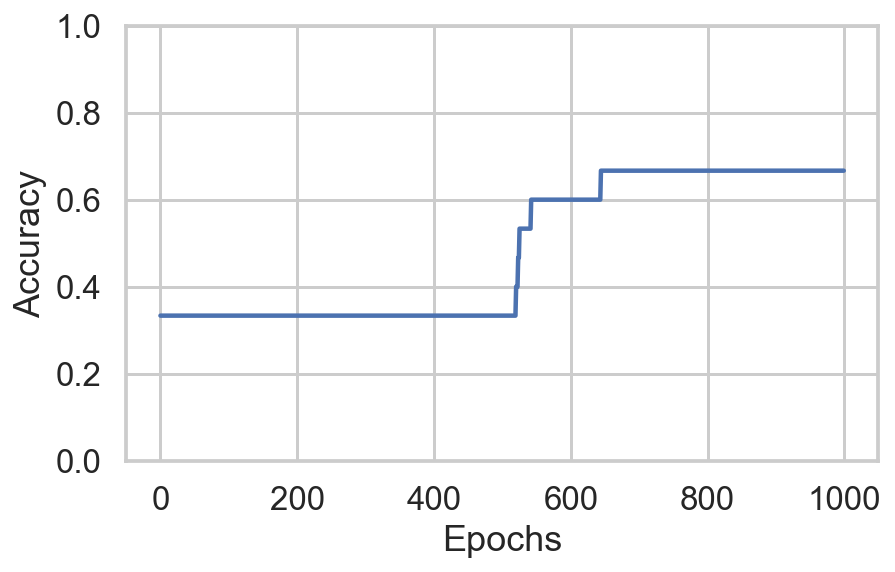

Test Accuracy =  0.6666666666666666


In [31]:
test_accuracy, weight_epoch = perceptron.fit(X_test, Y_test, 1000, 0.0001, True)
print("Test Accuracy = ", test_accuracy)

In [32]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.6666666666666666


In [33]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15



In [34]:
###c) Try changing the learning rates and write your interpretation on the change in result
learning_rate = 0.00000001
epochs = 1000
dash = "-"*50

In [35]:
while(learning_rate <= 0.01):
    print(dash)
    print("Learning Rate = ", learning_rate)
    perceptron = Perceptron()
    train_accuracy, weight_epoch = perceptron.fit(X_train, Y_train, epochs, learning_rate, False)
    print("Train Accuracy = ", round(train_accuracy, 2))
    test_accuracy, weight_epoch = perceptron.fit(X_test, Y_test, epochs, learning_rate, False)
    print("Test Accuracy = ", round(test_accuracy, 2))
    Y_pred_test = perceptron.predict(X_test)
    print("Accuracy Score = ", round(accuracy_score(Y_pred_test, Y_test), 2))
    learning_rate = learning_rate * 10

--------------------------------------------------
Learning Rate =  1e-08
Train Accuracy =  0.33
Test Accuracy =  0.33
Accuracy Score =  0.33
--------------------------------------------------
Learning Rate =  1e-07
Train Accuracy =  0.33
Test Accuracy =  0.33
Accuracy Score =  0.33
--------------------------------------------------
Learning Rate =  1e-06
Train Accuracy =  0.33
Test Accuracy =  0.33
Accuracy Score =  0.33
--------------------------------------------------
Learning Rate =  9.999999999999999e-06
Train Accuracy =  0.67
Test Accuracy =  0.33
Accuracy Score =  0.33
--------------------------------------------------
Learning Rate =  9.999999999999999e-05
Train Accuracy =  0.67
Test Accuracy =  0.67
Accuracy Score =  0.67
--------------------------------------------------
Learning Rate =  0.001
Train Accuracy =  0.67
Test Accuracy =  0.67
Accuracy Score =  0.67
--------------------------------------------------
Learning Rate =  0.01
Train Accuracy =  0.67
Test Accuracy =  0.6

#### Interpretation:
#### Accuracy is very less (0.33) when learning_rate = 0.00000001 but as it keeps on increasing, accuracy stays same at 0.67

#### <span style='font-family:Georgia'> d) In the practice code given we had visualized the weights associated with each feature as a graph. Now you modify the code such that you can save all the weights in each epoch and try plotting all of those( Use Weight matrix inside the epoch loop and keep appending the weights). Write your interpretations on the same in your own words

In [36]:
learning_rate = 0.0001
epochs = 1500
perceptron = Perceptron()
train_accuracy, weight_epoch = perceptron.fit(X_train, Y_train, epochs, learning_rate, False)
print("Train Accuracy = ", round(train_accuracy, 2))
test_accuracy, weight_epoch = perceptron.fit(X_test, Y_test, epochs, learning_rate, False)
print("Test Accuracy = ", round(test_accuracy, 2))

Train Accuracy =  0.67
Test Accuracy =  0.67


In [37]:
list_w_e = [[i[0][0],i[0][1],i[0][2],i[0][3],i[1]] for i in weight_epoch]
df = pd.DataFrame(list_w_e)
df

,0,1,2,3,4
0,0.99760,0.99839,0.99927,0.99989,0
1,0.99520,0.99678,0.99854,0.99978,1
2,0.99280,0.99517,0.99781,0.99967,2
3,0.99040,0.99356,0.99708,0.99956,3
4,0.98800,0.99195,0.99635,0.99945,4
...,...,...,...,...,...
1495,-0.32503,0.10929,0.59589,0.93475,1495
1496,-0.32503,0.10929,0.59589,0.93475,1496
1497,-0.32503,0.10929,0.59589,0.93475,1497
1498,-0.32503,0.10929,0.59589,0.93475,1498


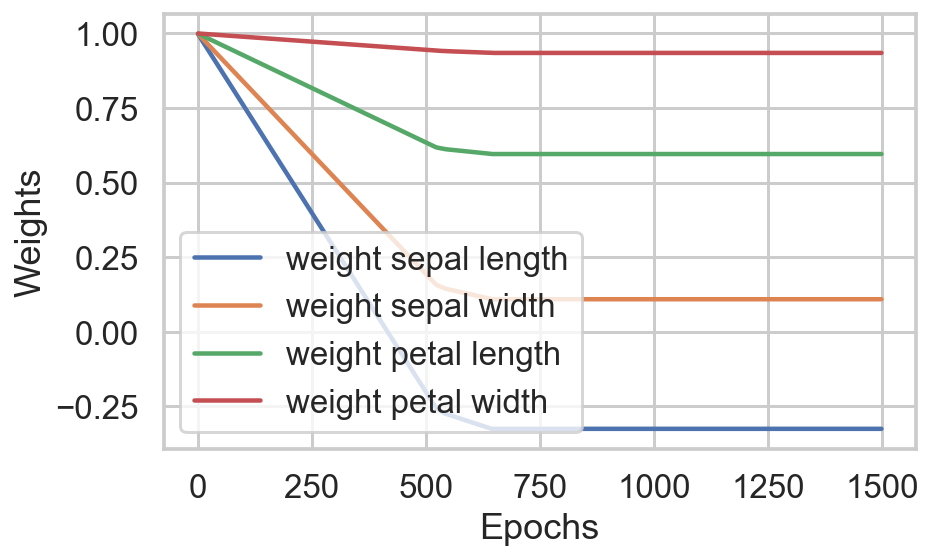

In [38]:
plt.plot(df[4],df[0], label = "weight sepal length")			
plt.plot(df[4],df[1], label = "weight sepal width")
plt.plot(df[4],df[2], label = "weight petal length")
plt.plot(df[4],df[3], label = "weight petal width")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.show() #epochs increases weight decreases